# Supervised Learning Project
### Author: Jinyu Du

## Project Description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set. Additionally, measure the AUC-ROC metric and compare it with the F1.

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Data description

The information about the `Churn.csv` dataset is given as follows:

### Features

- `RowNumber` - data string index 
- `CustomerId` - unique customer identifier   
- `Surname` - surname  
- `CreditScore` - credit score  
- `Geography` - country of residence
- `Gender` - gender  
- `Age` - age 
- `Tenure` - period of maturation for a customer’s fixed deposit (years) 
- `Balance` - account balance
- `NumOfProducts` - number of banking products used by the customer  
- `HasCrCard` - customer has a credit card 
- `IsActiveMember` - customer’s activeness 
- `EstimatedSalary` - estimated salary

### Target

- `Exited` -  сustomer has left 

## Purpose of the project
- import and study the datasets
- prepare and tidy up the datasets when needed
- examine the balance of classes 
- split the data into train, test, and validation sets
- train the model without taking into account the imbalance and describe the findings.
- improve the quality of the model, taking into account the imbalance of classes. 
- compute the f1 score and AUC
- plot the ROC curve
- fit different types of classification models and compare the performance
- draw conclusions and explain the results

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
try: 
    df = pd.read_csv('datasets/Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
display(df.head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


For the purpose of predicting whether a customer will leave the bank soon, some columns such as `RowNumber`, `CustomerId` and `Surname` are not useful. Thus, we will drop them from the dataset. 

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [8]:
display(df.head(10))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


The three columns `RowNumber`, `CustomerId` and `Surname` have been dropped from the dataset successfully. Now, let's look at the rest of the columns in detail. 

## Data cleaning and wrangling

### Look at missing values

In [9]:
df_missing_perct = (df.isna().sum())/df.shape[0]*100
print(df_missing_perct)

CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64


The result above shows that all columns except `Tenure` do not have missing values. The column `Tenure` has about 9.09% data as missing values. Because it is hard to do imputation for this column and the percentage of missing values is not high, we can drop all rows with missing values for `Tenure`.

In [10]:
df.dropna(axis=0, subset=['Tenure'], inplace=True)

In [11]:
df_missing_perct = (df.isna().sum())/df.shape[0]*100
print(df_missing_perct)

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


After dropping all rows with missing values in `Tenure`, the dataset now does not has missing values.  

### Credit score

The column `CreditScore` has `int64` as the data type, which is good. 

Let's plot the histogram and boxplot of `CreditScore` and have some idea of its distribution.   

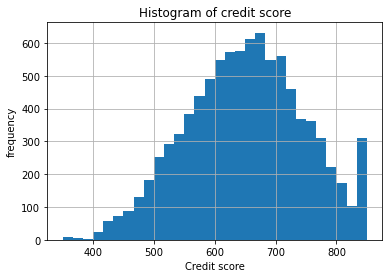

In [12]:
df.hist("CreditScore", bins=30);
plt.xlabel('Credit score')
plt.ylabel('frequency')
plt.title('Histogram of credit score');

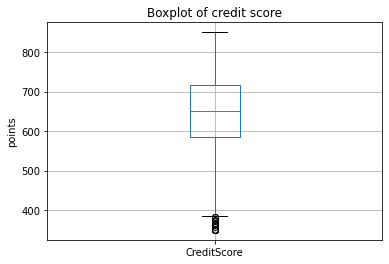

In [13]:
df.boxplot("CreditScore")
plt.ylabel('points')
plt.title('Boxplot of credit score')
plt.show()

The histogram and boxplot show that the distribution of `CreditScore` is left-skewed with median around 650. There are some customers with low credit scores that are below 380.  

It seems that the column `CreditScore` is in good shape and we do not need to do anything else about it. 

### Geography

In [14]:
geo = df['Geography'].value_counts(dropna=False)
geo


France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

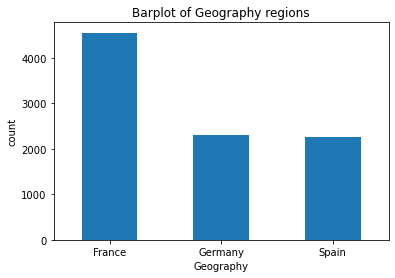

In [15]:
geo.plot.bar(x='Geography', rot=0);
plt.xlabel('Geography')
plt.ylabel('count')
plt.title('Barplot of Geography regions');


The `Geography` column has three categories: France, Germany and Spain. The number of users from France is about twice as the number of users from either Germany or Spain.    

### Gender

In [16]:
gender = df['Gender'].value_counts(dropna=False)
gender

Male      4974
Female    4117
Name: Gender, dtype: int64

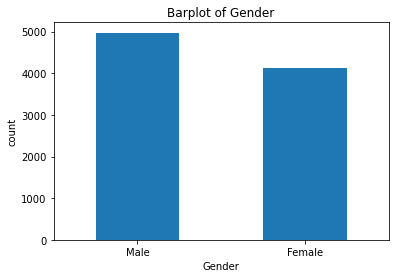

In [17]:
gender.plot.bar(x='Gender', rot=0);
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Barplot of Gender');

The `Gender` column has two categories: Male and Female. The number of male users is 4974 and the number of female users is 4117.  

### Age

Let's plot the histogram and boxplot of `Age` and have some idea of its distribution.   

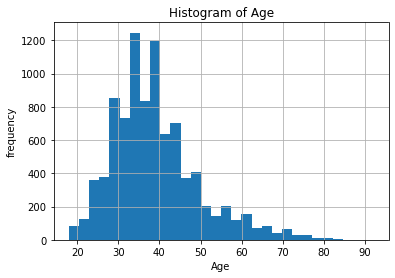

In [18]:
df.hist("Age", bins=30);
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Histogram of Age');

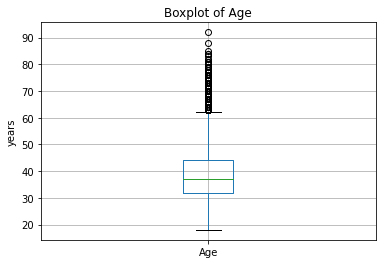

In [19]:
df.boxplot("Age")
plt.ylabel('years')
plt.title('Boxplot of Age')
plt.show()

The histogram and boxplot show that the distribution of `Age` is right-skewed with median around 35. There are some customers with age above 62 and those are outliers in terms of age.  

It seems that the column `Age` is in good shape and we do not need to do anything else about it. 

### Tenure

In [20]:
tenure = df['Tenure'].value_counts(dropna=False)
tenure

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

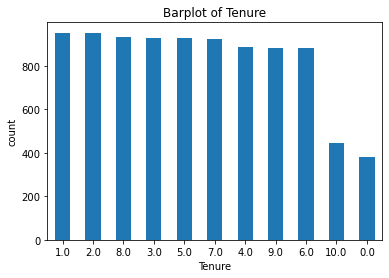

In [21]:
tenure.plot.bar(x='Tenure', rot=0);
plt.xlabel('Tenure')
plt.ylabel('count')
plt.title('Barplot of Tenure');


The `Tenure` column has 11 categories. It seems that this column is in good shape and we do not need to do anything else about it.    

### Balance


Let's plot the histogram and boxplot of `Balance` and have some idea of its distribution.   

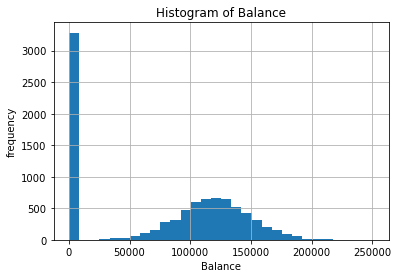

In [22]:
df.hist("Balance", bins=30);
plt.xlabel('Balance')
plt.ylabel('frequency')
plt.title('Histogram of Balance');

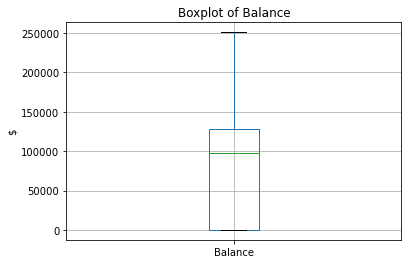

In [23]:
df.boxplot("Balance")
plt.ylabel('$')
plt.title('Boxplot of Balance')
plt.show()

The histogram and boxplot show that the distribution of `Balance` is left-skewed with median around 100000 dollars. There are some customers 0 or very small balance on their account.  

It seems that the column `Balance` is in good shape and we do not need to do anything else about it. 

### NumOfProducts

In [24]:
num_products = df['NumOfProducts'].value_counts(dropna=False)
num_products

1    4617
2    4184
3     234
4      56
Name: NumOfProducts, dtype: int64

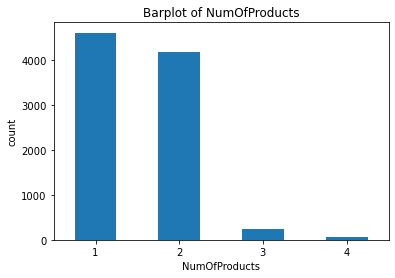

In [25]:
num_products.plot.bar(x='NumOfProducts', rot=0);
plt.xlabel('NumOfProducts')
plt.ylabel('count')
plt.title('Barplot of NumOfProducts');

Many customers have one or two products. Only few customers have three or four products. 

### HasCrCard

In [26]:
has_credit_card = df['HasCrCard'].value_counts(dropna=False)
has_credit_card

1    6409
0    2682
Name: HasCrCard, dtype: int64

About 6409 customers have credit card and 2682 customers do not have credit card.

### IsActiveMember 

In [27]:
is_active_member = df['IsActiveMember'].value_counts(dropna=False)
is_active_member

1    4687
0    4404
Name: IsActiveMember, dtype: int64

About half of the customers are active members and the other half are not active members. 

### EstimatedSalary


Let's plot the histogram and boxplot of `EstimatedSalary` and have some idea of its distribution.   

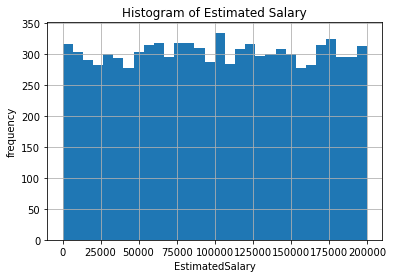

In [28]:
df.hist("EstimatedSalary", bins=30);
plt.xlabel('EstimatedSalary')
plt.ylabel('frequency')
plt.title('Histogram of Estimated Salary');

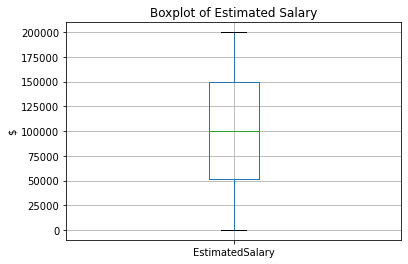

In [29]:
df.boxplot("EstimatedSalary")
plt.ylabel('$')
plt.title('Boxplot of Estimated Salary')
plt.show()

The histogram and boxplot show that the distribution of `EstimatedSalary` is almost uniform with median around 100000 dollars. That is quite interesting.  

It seems that the column `EstimatedSalary` is in good shape and we do not need to do anything else about it. 

### Exited

In [30]:
exited = df['Exited'].value_counts(dropna=False)
exited

0    7237
1    1854
Name: Exited, dtype: int64

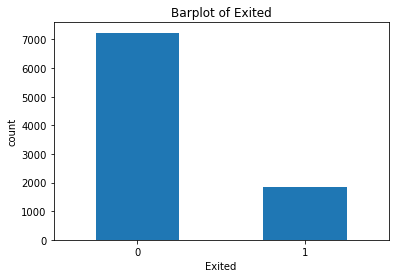

In [31]:
exited.plot.bar(x='Exited', rot=0);
plt.xlabel('Exited')
plt.ylabel('count')
plt.title('Barplot of Exited');

The column `Exited` is the target variable. About 1854 customers have exited. The other 7237 customers have not exited. The target classes [(exit) : (not exited)] has a [1:4] ratio. There is some class imbalance issues.

By looking at each column in detail, we conclude that the dataset is clean and in good shape for builing models.

## Modeling

### One-hot encoding for categorical variables

In [32]:
data_ohe = pd.get_dummies(df, drop_first=True)
display(data_ohe.head(10))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


We performed one-hot encoding for the categorical variables `Geography` and `Gender` in the dataset. 

### Split the dataset into training, validation and test datasets

Next, we will split the dataset into training, validation and test datasets according to a 3:1:1 ratio. 

In [33]:
df_train, df_valid = train_test_split(data_ohe, test_size=0.2, random_state=12345) 
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=12345) 

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Let me check the size of each part and make sure the sizes make sense. 

In [34]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(5817, 11)
(5817,)
(1819, 11)
(1819,)
(1455, 11)
(1455,)


The sizes of the training, validation and test datasets look good!

### Feature scaling

It is apparent that the numeric variables 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts' and 'EstimatedSalary' are on vastly different scales. Let's scale the features by standardizing the data.

In [35]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'EstimatedSalary']

# < write code here >
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.head(10))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3004,-0.540565,0.753449,0.004092,1.020764,0.796659,1,1,1.289847,1,0,1
5874,-0.530315,-1.903262,-1.030717,-1.230647,0.796659,1,1,-0.155815,0,0,1
7440,-0.274076,0.753449,0.349028,1.055003,-0.911474,0,0,0.002966,0,1,0
1038,-1.288784,-0.859554,-1.375653,0.105248,-0.911474,1,1,0.662545,0,0,1
8269,-0.386821,1.322745,0.693964,-1.230647,0.796659,0,1,0.980560,0,0,0
6248,-0.602062,0.753449,-0.685781,-1.230647,0.796659,1,0,1.245808,0,0,1
5070,-0.079334,0.279037,0.349028,-1.230647,0.796659,0,0,0.366762,0,0,0
7159,-1.268284,1.892040,0.349028,-0.342071,-0.911474,1,0,-0.289385,0,0,0
1508,-0.745556,-0.290259,0.349028,-1.230647,0.796659,1,1,-0.897490,0,0,1
1073,-1.493775,-0.195376,0.349028,-1.230647,0.796659,0,0,0.633555,0,1,1


### Logistic regression model without considering target imbalance

In [36]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
    
print('For the validation dataset: precision={:.3f}, Recall = {:.3f}, f1 = {:.3f}'.format(
    precision, recall, f1))

predicted_test = model.predict(features_test)
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
f1 = f1_score(target_test, predicted_test)
    
print('For the test dataset: precision={:.3f}, Recall = {:.3f}, f1 = {:.3f}'.format(
    precision, recall, f1))


For the validation dataset: precision=0.655, Recall = 0.211, f1 = 0.320
For the test dataset: precision=0.604, Recall = 0.195, f1 = 0.295


We see that the precision, recall and f1 scores for the model are all pretty low for the logistic regression model without considering target imbalance. 

The column `Exited` is the target variable. About 1854 customers have exited. The other 7237 customers have not exited. The target classes [(exit) : (not exited)] has a [1:4] ratio. There is some class imbalance issues.


Next, let's build logistic regression model with consideration for target imbalance.

### Logistic regression model with consideration for target imbalance

In [37]:
model = LogisticRegression(random_state=12345, 
                           solver='liblinear', 
                           class_weight='balanced')

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
    
print('For the validation dataset: precision={:.3f}, Recall = {:.3f}, f1 = {:.3f}'.format(
    precision, recall, f1))

predicted_test = model.predict(features_test)
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
f1 = f1_score(target_test, predicted_test)
    
print('For the test dataset: precision={:.3f}, Recall = {:.3f}, f1 = {:.3f}'.format(
    precision, recall, f1))

For the validation dataset: precision=0.398, Recall = 0.713, f1 = 0.511
For the test dataset: precision=0.392, Recall = 0.702, f1 = 0.503


We see that with consideration for target imbalance, the f1 score has increased significantly. But it is still not good enough because we aim for a model with f1 score of at least 0.59. 

### ROC curve

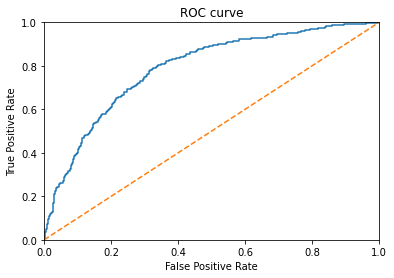

In [38]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--');

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >

# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >

# < add the heading "ROC curve" with the function plt.title() >

plt.show();

### AUC-ROC 

In [39]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.7888122605363985


The logistic regression model with consideration for target imbalance has f1 score 0.503 for the test dataset, which is below 0.59. The ROC curve is shown above. The area under the curve is 0.789. 

To achieve higher f1 scores, we need to look at other types of models.

## Random Forest Classifier

### Label encoding for the categorical variables in the dataset


In [40]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)


### Split the dataset into training, validation and test datasets

Next, we will split the dataset into training, validation and test datasets according to a 3:1:1 ratio. 

In [41]:
df_train, df_valid = train_test_split(data_ordinal, test_size=0.2, random_state=12345) 
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=12345) 

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Let me check the size of each part and make sure the sizes make sense. 

In [42]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(5817, 10)
(5817,)
(1819, 10)
(1819,)
(1455, 10)
(1455,)


The sizes of the training, validation and test datasets look good!

### Feature scaling

It is apparent that the numeric variables 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts' and 'EstimatedSalary' are on vastly different scales. Let's scale the features by standardizing the data.

In [43]:
numeric = ['CreditScore', 'Geography','Age', 'Tenure', 'Balance', 'NumOfProducts',
          'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.head(10))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2713,-0.542647,0.308376,1.0,0.753970,0.004092,1.316834,0.796659,1.0,1.0,1.286364
5331,-0.532374,-0.902030,1.0,-1.904174,-1.030717,-0.958437,0.796659,1.0,1.0,-0.156185
6749,-0.275545,1.518781,0.0,0.753970,0.349028,1.375108,-0.911474,0.0,0.0,0.001260
929,-1.292587,-0.902030,1.0,-0.859903,-1.375653,-0.621684,-0.911474,1.0,1.0,0.668782
7513,-0.388550,-0.902030,0.0,1.323572,0.693964,-0.958437,0.796659,0.0,1.0,0.978717
5674,-0.604286,-0.902030,1.0,0.753970,-0.685781,-0.958437,0.796659,1.0,0.0,1.239092
4592,-0.080356,-0.902030,0.0,0.279301,0.349028,-0.958437,0.796659,0.0,0.0,0.369903
6494,-1.272041,-0.902030,0.0,1.893174,0.349028,-0.909961,-0.911474,1.0,0.0,-0.291138
1350,-0.748110,-0.902030,1.0,-0.290301,0.349028,-0.958437,0.796659,1.0,1.0,-0.911388
960,-1.498050,1.518781,1.0,-0.195367,0.349028,-0.958437,0.796659,0.0,0.0,0.638666


First, let's fit a Random Forest Classifier without consideration for target imbalance. We loop through `n_estimators` from 1 to 100, and `max_depth` from 1 to 10 and select the model with the highest f1 score. 

In [44]:
max_f1 = 0 
max_d = 0 
n_esti = 0

for n in range(1, 101, 1):
    for d in range(1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators=n, max_depth=d)
        model.fit(features_train, target_train) 
        predicted_test = model.predict(features_test)
        f1 = f1_score(target_test, predicted_test)
        if f1 > max_f1:
            max_f1 = f1
            max_d = d 
            n_esti = n
            
print("n_estimators =", n_esti, "max_depth = ", max_d, ": ", end='')
print("f1 score is", max_f1) 

n_estimators = 95 max_depth =  9 : f1 score is 0.5497630331753554


It shows that the best Random Forest Classifier without consideration for target imbalance has `n_estimators = 95` and `max_depth = 9`. The f1 score for the test dataset is 0.55. 

This model performs better than the logistic regression model with consideration for target imbalance. But it is still not good enough because we aim for a model with f1 score of at least 0.59. 

Now, let's upsample the dataset and then fit a Random Forest Classifier with consideration for target imbalance. 

### Upsampling

We will repeat the features with target == 1 four times because the target classes [(exit 1) : (not exited 0)] has a [1:4] ratio. 

In [45]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4)

Let's fit a Random Forest Classifier with consideration for target imbalance. We loop through `n_estimators` from 1 to 100, and `max_depth` from 1 to 10 and select the model with the highest f1 score. 

In [46]:
max_f1 = 0 
max_d = 0 
n_esti = 0

for n in range(1, 101, 1):
    for d in range(1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators=n, max_depth=d)
        model.fit(features_upsampled, target_upsampled) 
        predicted_test = model.predict(features_test)
        f1 = f1_score(target_test, predicted_test)
        if f1 > max_f1:
            max_f1 = f1
            max_d = d 
            n_esti = n
            
print("n_estimators =", n_esti, "max_depth = ", max_d, ": ", end='')
print("f1 score is", max_f1) 

n_estimators = 19 max_depth =  10 : f1 score is 0.611023622047244


It shows that the best Random Forest Classifier with consideration for target imbalance has `n_estimators = 19` and `max_depth = 10`. The f1 score for the test dataset is 0.61. 

This model performs better than the Random Forest Classifier without consideration for target imbalance. It is now good enough because we have achieved our aim for a model with f1 score of at least 0.59. 

Now, let's plot the ROC curve and compute the AOC for the optimal model. 

### ROC curve

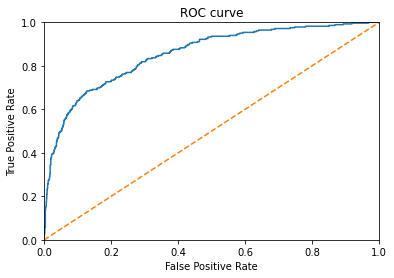

In [47]:
model = RandomForestClassifier(random_state=12345, n_estimators=19, max_depth=10)
model.fit(features_upsampled, target_upsampled) 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--');

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >

# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >

# < add the heading "ROC curve" with the function plt.title() >

plt.show();

### AUC-ROC 

In [48]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8547671304105977


The best Random Forest Classifier with consideration for target imbalance has f1 score 0.61 for the test dataset, which is above 0.59. The ROC curve is shown above. The area under the curve is 0.855. 

## General conclusion

In this project, we analyzed clients’ past behavior and termination of contracts with the Beta bank. The major steps for analyzing the data are:

- import and study the datasets
- prepare and tidy up the datasets when needed
- examine the balance of classes 
- split the data into train, test, and validation sets
- train the model without taking into account the imbalance and describe the findings.
- improve the quality of the model, taking into account the imbalance of classes. 
- compute the f1 score and AUC
- plot the ROC curve
- fit different types of classification models and compare the performance
- draw conclusions and explain the results


The main findings are:
- The raw dataset was clean and required minimal cleaning.
- To achieve a high f1 score using the logistic regression, the categorical variables in the dataset need to be one-hot encoded and the numerical variables need to be standardized. Moreover, class imbalance issues needs to be addressed.
- To achieve a high f1 score using the Random Forest Classifier, the categorical variables in the dataset need to be label encoded and the numerical variables need to be standardized. Moreover, class imbalance issues needs to be addressed using upsampling.
- The optimal model we found is the Random Forest Classifier with consideration for target imbalance. It has `n_estimators = 19` and `max_depth = 10`. The f1 score for the test dataset is 0.61. 
- The ROC curve for the test dataset looks good. The area under the curve is 0.855, which is very good.
